In [1]:
#各ライブラリをimportする

import pandas as pd
import numpy  as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#機械学習系ライブラリのimport
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#カレントディレクトリをファイルのあるフォルダへ
import os
os.chdir("C:\\Python27\\titanic")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
train["Fare"].fillna(train["Fare"].median(),inplace=True)
test["Fare"].fillna(test["Fare"].median(),inplace=True)

gender = {"male":0,"female":1}
train["Sex"] = train["Sex"].map(gender).astype(int)
test["Sex"] = test["Sex"].map(gender).astype(int)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

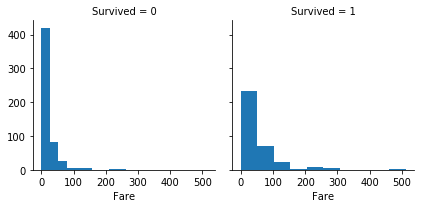

In [7]:
g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist,"Fare",bins=10)

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


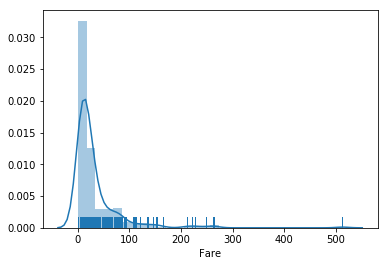

In [8]:
sns.distplot(train["Fare"],bins=30,rug=True)

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


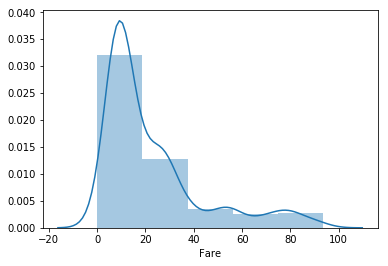

In [9]:
row = train[train.Fare <100]
sns.distplot(row["Fare"],bins=5)

In [10]:
labels = ["row","mid_row","normal","mid_high","high","ex_high"]

train["Fare_cal"] = pd.cut(train.Fare,[-1,15,40,100,200,300,800],
                           labels= labels)
test["Fare_cal"] = pd.cut(test.Fare,[-1,15,40,100,200,300,800],
                          labels=labels )

train["Fare_cal"].value_counts()
train[["Fare_cal","Survived","Age"]].groupby(["Fare_cal"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Fare_cal,Survived,Age
5,ex_high,1.000000,35.333333
3,mid_high,0.757576,32.430667
4,high,0.647059,30.333333
2,normal,0.601626,34.826923
1,mid_row,0.447471,28.326226
0,row,0.248908,28.697400


In [11]:
test[["Fare_cal","Age"]].groupby(["Fare_cal"],as_index=False).mean()

,Fare_cal,Age
0,row,26.576346
1,mid_row,29.264409
2,normal,36.740385
3,mid_high,37.230769
4,high,42.970588
5,ex_high,58.000000


In [12]:
train["Fare_cal"]

0          row
1       normal
2          row
3       normal
4          row
5          row
6       normal
7      mid_row
8          row
9      mid_row
10     mid_row
11     mid_row
12         row
13     mid_row
14         row
15     mid_row
16     mid_row
17         row
18     mid_row
19         row
20     mid_row
21         row
22         row
23     mid_row
24     mid_row
25     mid_row
26         row
27        high
28         row
29         row
        ...   
861        row
862    mid_row
863     normal
864        row
865        row
866        row
867     normal
868        row
869        row
870        row
871     normal
872        row
873        row
874    mid_row
875        row
876        row
877        row
878        row
879     normal
880    mid_row
881        row
882        row
883        row
884        row
885    mid_row
886        row
887    mid_row
888    mid_row
889    mid_row
890        row
Name: Fare_cal, Length: 891, dtype: category
Categories (6, object): [row < mid_row <

In [13]:
map = {"row":0,"mid_row":1,"normal":2,"mid_high":3,"high":4,"ex_high":5}

train["Fare_cal"] = train["Fare_cal"].map(map)

In [14]:
train["Fare_cal"].describe()

count    891.000000
mean       0.768799
std        0.986637
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: Fare_cal, dtype: float64

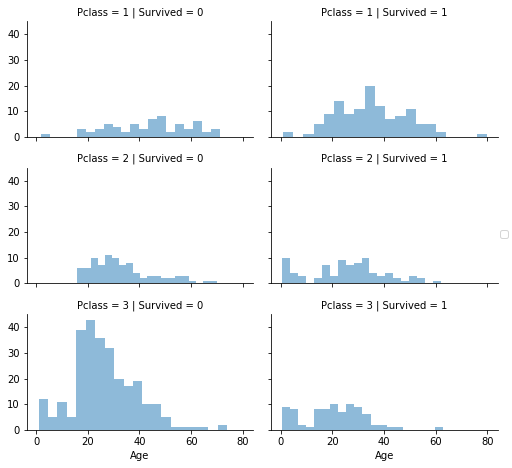

In [15]:
grid = sns.FacetGrid(train,col="Survived",row="Pclass",size=2.2,aspect=1.6)
grid.map(plt.hist,"Age",alpha=.5,bins=20)
grid.add_legend();

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


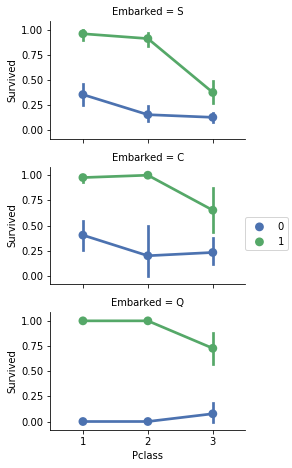

In [16]:
grid = sns.FacetGrid(train,row="Embarked",size=2.2,aspect=1.6)
grid.map(sns.pointplot,"Pclass","Survived","Sex",palette="deep")
grid.add_legend();

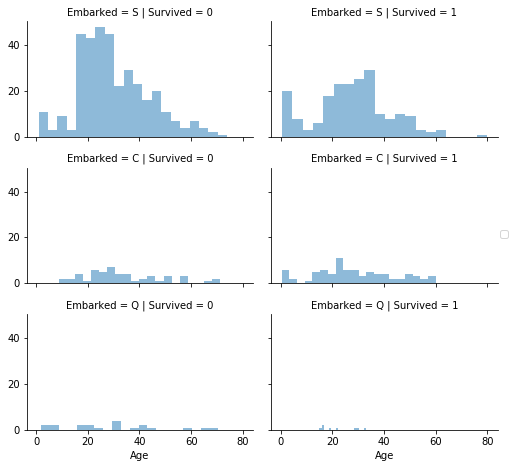

In [17]:
grid = sns.FacetGrid(train,col="Survived",row="Embarked",size=2.2,aspect=1.6)
grid.map(plt.hist,"Age",alpha=.5,bins=20)
grid.add_legend();

In [18]:
print("Before",train.shape,test.shape,combine[0].shape,combine[1].shape)

train = train.drop(["Ticket","Cabin"],axis=1)
test = test.drop(["Ticket","Cabin"],axis=1)
combine = [train,test]

print("After",train.shape,test.shape,combine[0].shape,combine[1].shape)

Before (891, 13) (418, 12) (891, 13) (418, 12)
After (891, 11) (418, 10) (891, 11) (418, 10)


In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])


Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [20]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace([
        "Lady","Countess","Capt","Col","Don","Dr",
        "Major","Rev","Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle","Miss")
    dataset["Title"] = dataset["Title"].replace("Ms","Miss")
    dataset["Title"] = dataset["Title"].replace("Mme","Mrs")

train[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
title_map ={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_map)
    dataset["Title"] = dataset["Title"].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_cal,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,1


In [22]:
train = train.drop(["Name","PassengerId"],axis=1)
test = test.drop(["Name"],axis=1)
combine= [train,test]
train.shape,test.shape

((891, 10), (418, 10))

In [ ]:
from sklearn.ensemble import RnadomForestRegressor

def fill_missing_age(df):
    age_df = df[["Age","Embarked","Fare","Parch","SibSp","Pclass"]]
    train = age_df.loc[(df.Age.notnull())]
    test = age_df.loc[(df.Age.isnull())]
    
    y = train.values[:,0]
    X = train.values[:,1::]
    